# Case study (CAPM using regression analysis)

## Part 1

CAPM formula:
$$r_i - r_f = \beta_i (r_m - r_f) + \epsilon_i$$ 

Hence, we fit the linear regression model,
$$r*_{i,t} = \alpha_i + \beta_i (r*_{m,t}) + \epsilon_{i,t}\ for\ t=1,2...$$
$$Regression\ Parameters:( \alpha_i, \beta_i)\ is\ such\ that\ \alpha_i\ is\ zero$$

We use data from 2007 to 2023 for a total of 12 different assets ranging from stocks to bonds.

In [11]:
suppressWarnings({
    library("zoo")
    load("casestudy_1_0.RData")
})    
dim(casestudy1.data0.00)
names(casestudy1.data0.00)
head(casestudy1.data0.00)
tail(casestudy1.data0.00)

[1] 4067   12

[1] "BAC"        "GE"         "GOOGL"      "XOM"        "SP500"     
 [6] "DGS3MO"     "DGS1"       "DGS5"       "DGS10"      "DAAA"      
[11] "DBAA"       "DCOILWTICO"

             BAC       GE    GOOGL   XOM   SP500 DGS3MO DGS1 DGS5 DGS10 DAAA
2007-01-03 53.33 228.0070 11.70145 74.11 1416.60   5.05 4.98 4.66  4.67 5.32
2007-01-04 53.67 226.6859 12.09359 72.72 1418.34   5.04 4.95 4.61  4.62 5.28
2007-01-05 53.24 225.5450 12.19194 73.24 1409.71   5.05 4.98 4.65  4.65 5.29
2007-01-08 53.45 225.4849 12.10160 72.65 1412.84   5.08 5.01 4.66  4.66 5.29
2007-01-09 53.50 225.4849 12.14965 72.09 1412.11   5.08 5.02 4.65  4.66 5.29
2007-01-10 53.58 225.5450 12.24875 70.99 1414.85   5.09 5.02 4.68  4.69 5.32
           DBAA DCOILWTICO
2007-01-03 6.28      58.31
2007-01-04 6.24      55.65
2007-01-05 6.25      56.29
2007-01-08 6.25      56.08
2007-01-09 6.25      55.65
2007-01-10 6.28      53.95

             BAC    GE GOOGL    XOM   SP500 DGS3MO DGS1 DGS5 DGS10 DAAA DBAA
2023-02-21 34.52 82.26 91.79 111.17 3997.34   4.86 5.07 4.16  3.95 4.76 5.82
2023-02-22 34.29 83.19 91.65 109.73 3991.05   4.84 5.07 4.13  3.93 4.71 5.78
2023-02-23 34.26 82.94 90.89 110.74 4012.32   4.84 5.03 4.09  3.88 4.68 5.74
2023-02-24 34.21 83.55 89.13 110.75 3970.04   4.86 5.05 4.19  3.95 4.75 5.81
2023-02-27 34.21 83.84 89.87 110.55 3982.24   4.89 5.03 4.17  3.92 4.73 5.79
2023-02-28 34.30 84.71 90.06 109.91 3970.15   4.88 5.02 4.18  3.92 4.76 5.82
           DCOILWTICO
2023-02-21      76.28
2023-02-22      73.95
2023-02-23      75.26
2023-02-24      76.19
2023-02-27      75.57
2023-02-28      75.57

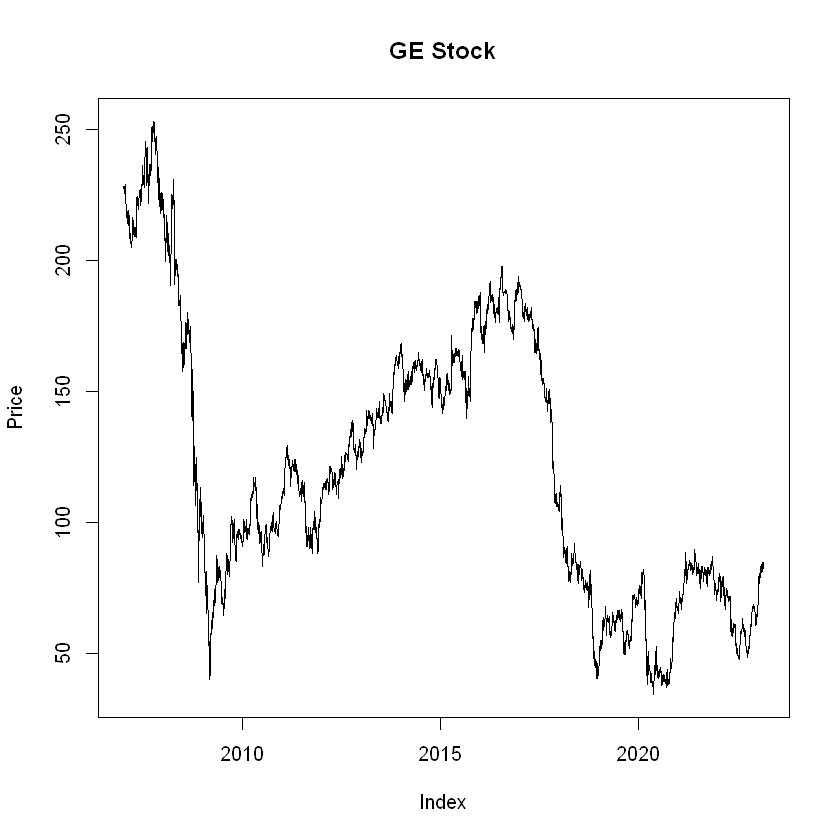

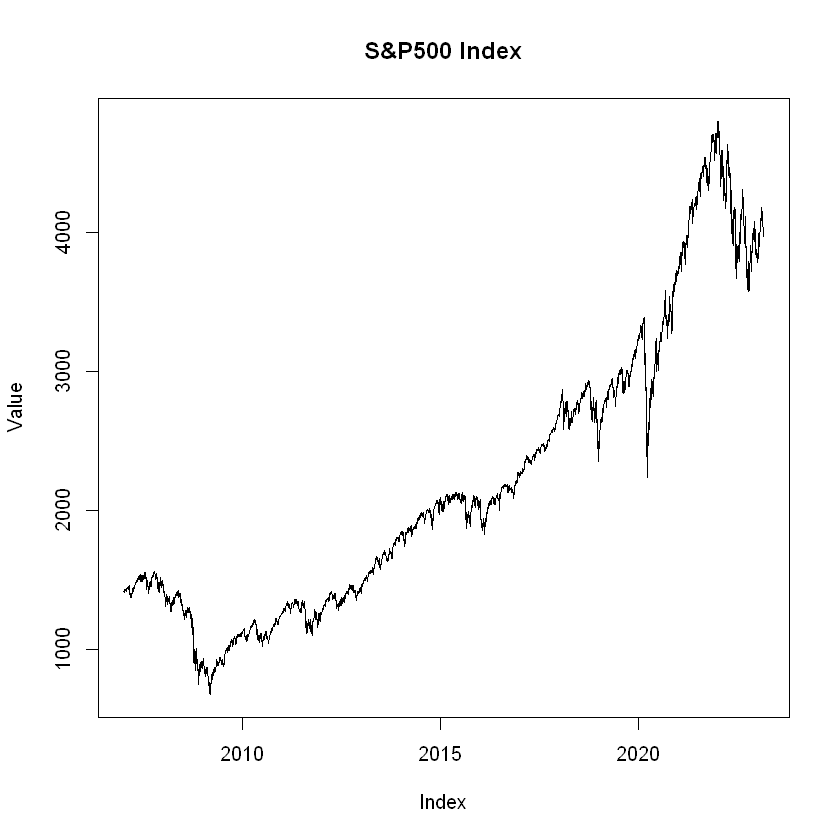

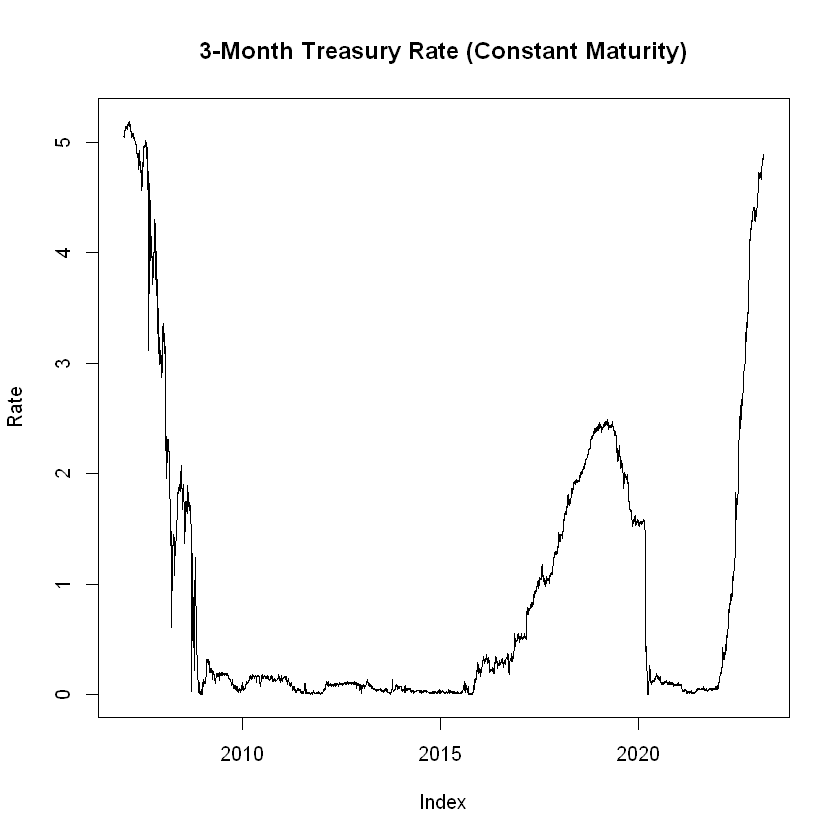

In [12]:
# We first plot the raw data for the stock $GE$, the market-portfolio index $SP500,$ and the risk-free interest rate.

suppressWarnings({
    library ("graphics")
    library("quantmod")
})   

plot(casestudy1.data0.00[,"GE"],ylab="Price",main="GE Stock")

plot(casestudy1.data0.00[,"SP500"], ylab="Value",main="S&P500 Index")

plot(casestudy1.data0.00[,"DGS3MO"], ylab="Rate" ,
     main="3-Month Treasury Rate (Constant Maturity)")

Now we construct the variables with the log daily returns of GE and the SP500 index as well as the risk-free asset returns

In [3]:
# Compute daily log returns of GE stock
r.daily.GE<-zoo( x=as.matrix(diff(log(casestudy1.data0.00[,"GE"]))), 
                 order.by=time(casestudy1.data0.00)[-1])
dimnames(r.daily.GE)[[2]]<-"r.daily.GE"
#dim(r.daily.GE)
#head(r.daily.GE)

# Compute daily log returns of the SP500 index
r.daily.SP500<-zoo( x=as.matrix(diff(log(casestudy1.data0.00[,"SP500"]))),
                    order.by=time(casestudy1.data0.00)[-1])
dimnames(r.daily.SP500)[[2]]<-"r.daily.SP500"
#dim(r.daily.SP500)
#head(r.daily.SP500)

# Compute daily return of the risk-free asset (3 month treasury bill) 
# accounting for the number of days between successive closing prices
# apply annual interest rate using 360 days/year (standard on 360-day year since the previous close)

r.daily.riskfree<-log(1 + .01*coredata(casestudy1.data0.00[-1,"DGS3MO"]) *
                        diff(as.numeric(time(casestudy1.data0.00)))/360)
dimnames(r.daily.riskfree)[[2]]<-"r.daily.riskfree"


# Compute excess returns over the risk free rate
r.daily.GE.0<-r.daily.GE - r.daily.riskfree
  dimnames(r.daily.GE.0)[[2]]<-"r.daily.GE.0"

r.daily.SP500.0<-r.daily.SP500 - r.daily.riskfree
  dimnames(r.daily.SP500.0)[[2]]<-"r.daily.SP500.0"

r.daily.data0<-merge(r.daily.GE, r.daily.SP500, r.daily.riskfree, 
                     r.daily.GE.0, r.daily.SP500.0)

head(r.daily.data0)
tail(r.daily.data0)

             r.daily.GE r.daily.SP500 r.daily.riskfree  r.daily.GE.0
2007-01-04 -0.005810928  0.0012275323     0.0001399902 -0.0059509182
2007-01-05 -0.005045801 -0.0061031679     0.0001402679 -0.0051860690
2007-01-08 -0.000266315  0.0022178572     0.0004232438 -0.0006895587
2007-01-09  0.000000000 -0.0005168099     0.0001411012 -0.0001411012
2007-01-10  0.000266315  0.0019384723     0.0001413789  0.0001249361
2007-01-11  0.009539029  0.0063198611     0.0001419344  0.0093970944
           r.daily.SP500.0
2007-01-04     0.001087542
2007-01-05    -0.006243436
2007-01-08     0.001794613
2007-01-09    -0.000657911
2007-01-10     0.001797093
2007-01-11     0.006177927

             r.daily.GE r.daily.SP500 r.daily.riskfree r.daily.GE.0
2023-02-21 -0.009437444  -0.020244784     0.0005398543 -0.009977299
2023-02-22  0.011242185  -0.001574795     0.0001344354  0.011107750
2023-02-23 -0.003009693   0.005315278     0.0001344354 -0.003144129
2023-02-24  0.007327812  -0.010593465     0.0001349909  0.007192821
2023-02-27  0.003464882   0.003068292     0.0004074170  0.003057465
2023-02-28  0.010323474  -0.003040620     0.0001355464  0.010187927
           r.daily.SP500.0
2023-02-21    -0.020784638
2023-02-22    -0.001709231
2023-02-23     0.005180843
2023-02-24    -0.010728455
2023-02-27     0.002660876
2023-02-28    -0.003176166

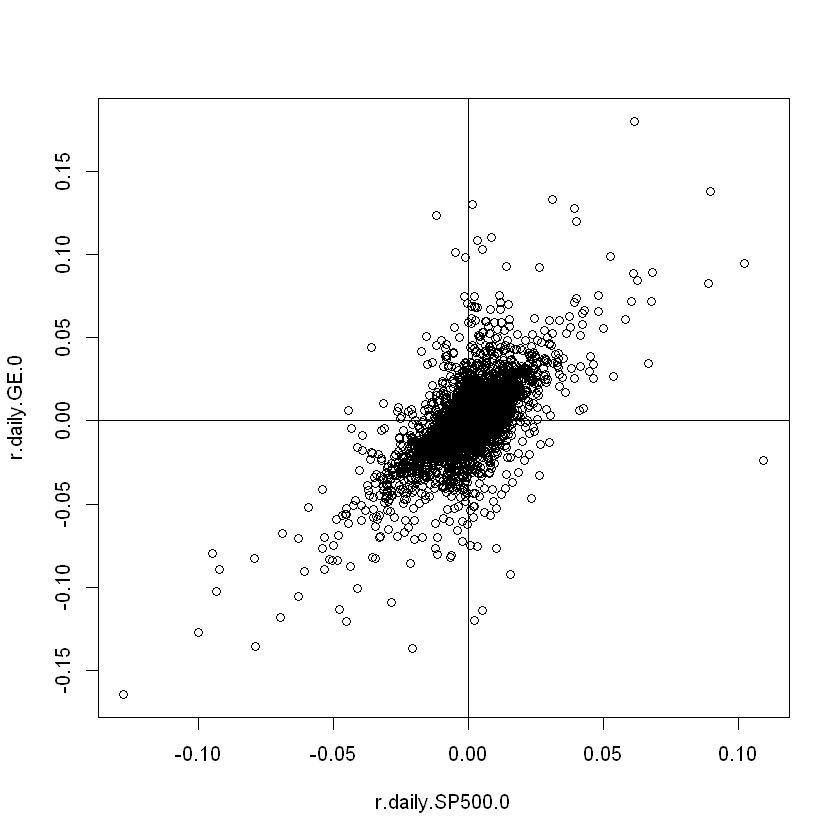

In [4]:
#Now we plot the excess returns of GE vs those of the SP500

plot(r.daily.SP500.0, r.daily.GE.0)
abline(h=0,v=0)

Next, we fit the daily excess returns of GE vs those of the SP500 using Ordinary Least Squares in accordance to the CAPM equation.

In [5]:
#options(show.signif.stars=FALSE)

lmfit0<-lm(r.daily.GE.0 ~ r.daily.SP500.0, data=r.daily.data0)
  names(lmfit0) #element names of list object lmfit0
  summary.lm(lmfit0) #function summarizing objects created by lm()


lmfit0.summary<-summary(lmfit0)
tstat.intercept<-round(lmfit0.summary$coefficients["(Intercept)", "t value"],digits=4)

# Note that the $t$-statistic for the intercept $\alpha_{GE}$ is not significant:
print(tstat.intercept)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"


Call:
lm(formula = r.daily.GE.0 ~ r.daily.SP500.0, data = r.daily.data0)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147102 -0.006193 -0.000208  0.006058  0.137012 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.0005256  0.0002600  -2.021   0.0433 *  
r.daily.SP500.0  1.1325836  0.0199922  56.651   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01658 on 4064 degrees of freedom
Multiple R-squared:  0.4413,	Adjusted R-squared:  0.4411 
F-statistic:  3209 on 1 and 4064 DF,  p-value: < 2.2e-16


[1] -2.0212


In [6]:
# Regression Diagnostics ----
#   Some useful R functions

#   anova.lm():  conduct an Analysis of Variance for the linear regression model, detailing the computation of the F-statistic for no regression structure.

#   influence.measures():  compute regression diagnostics evaluating case influence for the linear regression model; includes `hat' matirx, case-deletion statistics for the regression coefficients and for the residual standard deviation.


# Compute influence measures (case-deletion statistics)
lmfit0.inflm<-influence.measures(lmfit0)
#names(lmfit0.inflm)
dim(lmfit0.inflm$infmat)
head(lmfit0.inflm$infmat)
head(lmfit0.inflm$is.inf)
# Table counts of influential/non-influential cases
# as measured by the hat/leverage statistic.
table(lmfit0.inflm$is.inf[,"hat"])


[1] 4066    6

,dfb.1_,dfb.r..S,dffit,cov.r,cook.d,hat
2007-01-04,-0.006289931,-4.220860e-04,-0.006311933,1.000660,1.992436e-05,0.0002470467
2007-01-05,0.002299228,-1.132753e-03,0.002546548,1.000789,3.243234e-06,0.0003066088
2007-01-08,-0.002073473,-2.522378e-04,-0.002093199,1.000733,2.191271e-06,0.0002495659
2007-01-09,0.001069697,-7.179989e-05,0.001071062,1.000737,5.737272e-07,0.0002470522
2007-01-10,-0.001307248,-1.592770e-04,-0.001319719,1.000739,8.710424e-07,0.0002495773
2007-01-11,0.002746441,1.268859e-03,0.003044861,1.000775,4.636694e-06,0.0002976269


,dfb.1_,dfb.r..S,dffit,cov.r,cook.d,hat
2007-01-04,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2007-01-05,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2007-01-08,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2007-01-09,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2007-01-10,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2007-01-11,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE



FALSE  TRUE 
 3911   155 

### Conclusion:

 - The beta coefficient for this OLS fit is statistically significant at a 95% confidence level.
 - However, we observe that the regression fit is not that good. Its relationship to the market index is not that strong.

We now replot the data using the fitted regression line as well as selectively highlighting of influential cases.
<br>The QQ plot is also added to see if residuals are normally distributed.

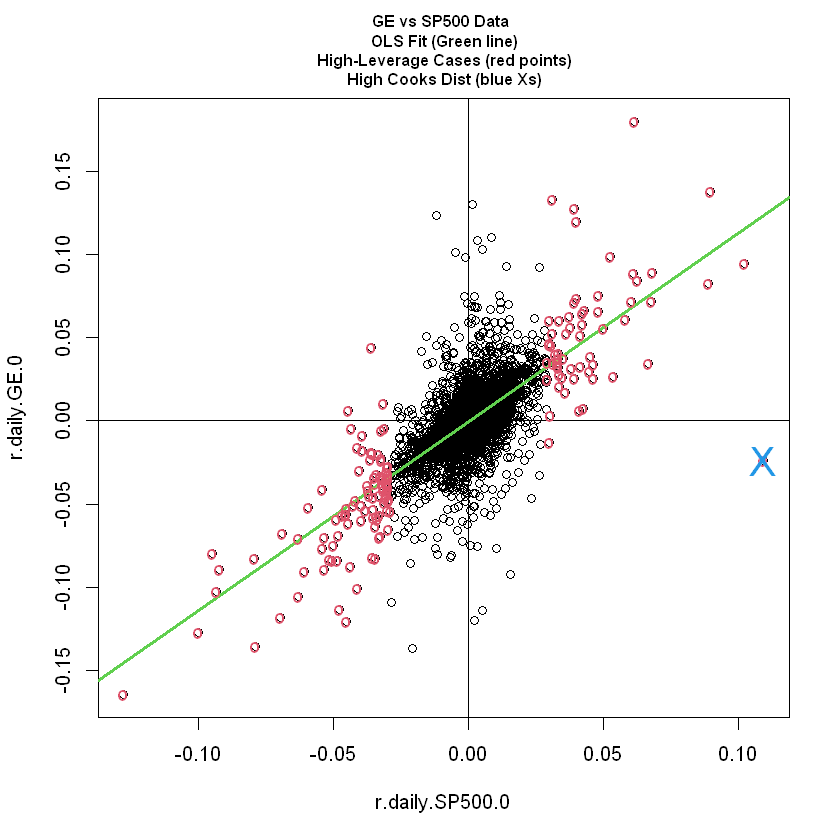

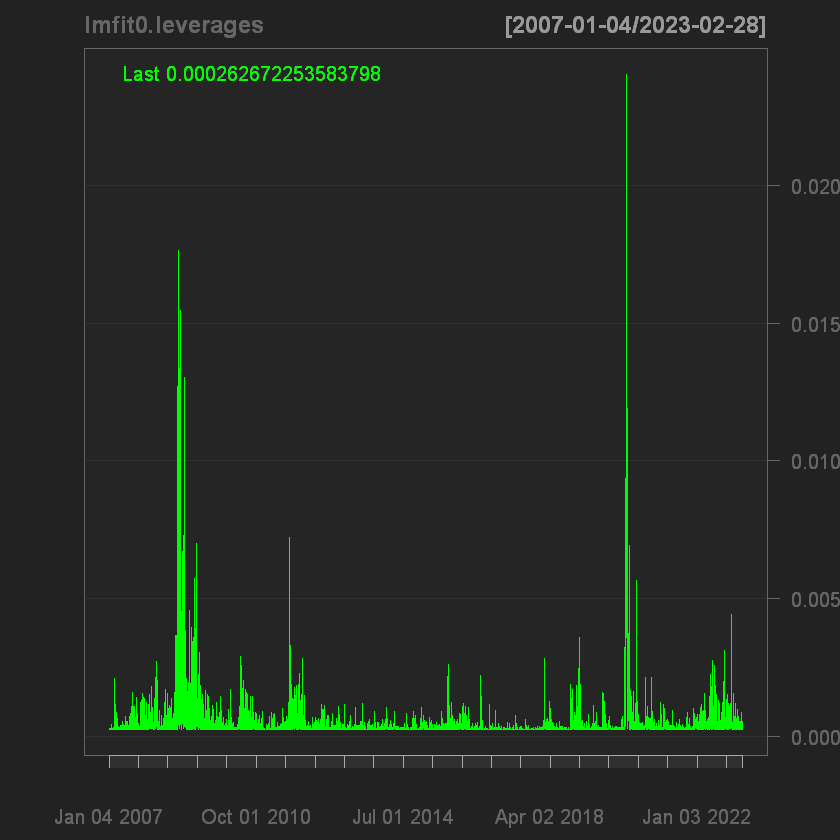

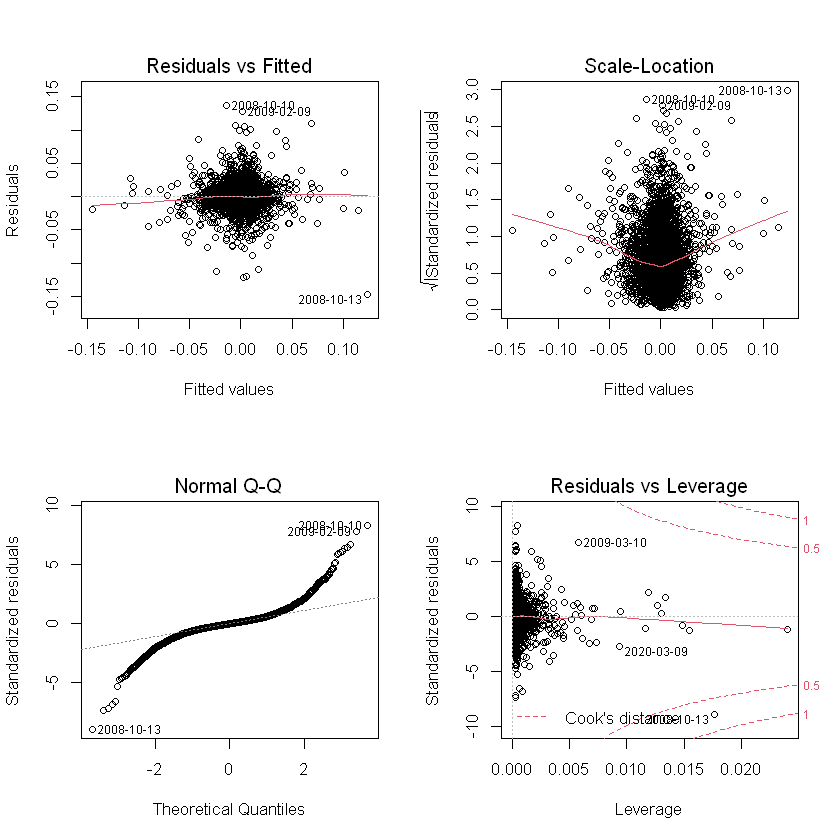

In [7]:
plot(r.daily.SP500.0, r.daily.GE.0,
     main="GE vs SP500 Data \n OLS Fit (Green line)\n High-Leverage Cases (red points)\n High Cooks Dist (blue Xs)", cex.main=0.8)
abline(h=0,v=0)
abline(lmfit0, col=3, lwd=3)

# Plot cases with high leverage as red (col=2) "o"s
index.inf.hat<-which(lmfit0.inflm$is.inf[,"hat"]==TRUE)
points(r.daily.SP500.0[index.inf.hat], r.daily.GE.0[index.inf.hat], 
        col=2, pch="o")

# Plot cases with high cooks distance as big (cex=2) blue (col=4) "X"s
index.inf.cook.d<-which(lmfit0.inflm$is.inf[,"cook.d"]==TRUE)
points(r.daily.SP500.0[index.inf.cook.d], r.daily.GE.0[index.inf.cook.d], 
       col=4, pch="X", cex=2.)

# Plot leverage of cases (diagonals of hat matrix)
lmfit0.leverages<-zoo(lmfit0.inflm$infmat[,"hat"], order.by=time(r.daily.SP500.0))
chartSeries(lmfit0.leverages)

layout(matrix(c(1,2,3,4),2,2)) # optional 4 graphs/page 
plot(lmfit0)

## Part 2

We now will modify the CAPM formula and add Macro-economic Factors to the OLS model.

In [8]:
# Compute daily log returns of GE stock
r.daily.GE<-zoo( x=as.matrix(diff(log(casestudy1.data0.00[,"GE"]))), order.by=time(casestudy1.data0.00)[-1])
dimnames(r.daily.GE)[[2]]<-"r.daily.GE"
#dim(r.daily.GE)
#head(r.daily.GE)

# Repeat for stocks BAC, GOOGL, XOM and for commodity DCOILWTICO

# Compute daily log returns of BAC stock
r.daily.BAC<-zoo( x=as.matrix(diff(log(casestudy1.data0.00[,"BAC"]))), order.by=time(casestudy1.data0.00)[-1])
dimnames(r.daily.BAC)[[2]]<-"r.daily.BAC"

# Compute daily log returns of GOOGL stock
r.daily.GOOGL<-zoo( x=as.matrix(diff(log(casestudy1.data0.00[,"GOOGL"]))), order.by=time(casestudy1.data0.00)[-1])
dimnames(r.daily.GOOGL)[[2]]<-"r.daily.GOOGL"

# Compute daily log returns of XOM stock
r.daily.XOM<-zoo( x=as.matrix(diff(log(casestudy1.data0.00[,"XOM"]))), order.by=time(casestudy1.data0.00)[-1])
dimnames(r.daily.XOM)[[2]]<-"r.daily.XOM"

# Compute daily log returns of DCOILWTICO (Crude Oil WTI)
r.daily.DCOILWTICO<-zoo( x=as.matrix(diff(log(casestudy1.data0.00[,"DCOILWTICO"]))), order.by=time(casestudy1.data0.00)[-1])
dimnames(r.daily.DCOILWTICO)[[2]]<-"r.daily.DCOILWTICO"

# Compute daily log returns of the SP500 index
r.daily.SP500<-zoo( x=as.matrix(diff(log(casestudy1.data0.00[,"SP500"]))), order.by=time(casestudy1.data0.00)[-1])
dimnames(r.daily.SP500)[[2]]<-"r.daily.SP500"

# Compute daily log change interest rate variables
dlog.daily.DGS1<-zoo( x=as.matrix(diff(log(casestudy1.data0.00[,"DGS1"]))), 
                      order.by=time(casestudy1.data0.00)[-1])
dimnames(dlog.daily.DGS1)[[2]]<-"dlog.daily.DGS1"

dlog.daily.DGS10<-zoo( x=as.matrix(diff(log(casestudy1.data0.00[,"DGS10"]))), 
                      order.by=time(casestudy1.data0.00)[-1])
dimnames(dlog.daily.DGS10)[[2]]<-"dlog.daily.DGS10"

dlog.daily.DAAA<-zoo( x=as.matrix(diff(log(casestudy1.data0.00[,"DAAA"]))), 
                       order.by=time(casestudy1.data0.00)[-1])
dimnames(dlog.daily.DAAA)[[2]]<-"dlog.daily.DAAA"

dlog.daily.DBAA<-zoo( x=as.matrix(diff(log(casestudy1.data0.00[,"DBAA"]))), 
                      order.by=time(casestudy1.data0.00)[-1])
dimnames(dlog.daily.DBAA)[[2]]<-"dlog.daily.DBAA"

# Compute daily return of the risk-free asset (accounting for the number of days since the previous close)

r.daily.riskfree<-log(1 + .01*coredata(casestudy1.data0.00[-1,"DGS3MO"]) *
                        diff(as.numeric(time(casestudy1.data0.00)))/360)
dimnames(r.daily.riskfree)[[2]]<-"r.daily.riskfree"

# Compute excess returns (over risk-free rate)

r.daily.GE.0<-r.daily.GE - r.daily.riskfree
  dimnames(r.daily.GE.0)[[2]]<-"r.daily.GE.0"

r.daily.BAC.0<-r.daily.BAC - r.daily.riskfree
dimnames(r.daily.BAC.0)[[2]]<-"r.daily.BAC.0"

r.daily.GOOGL.0<-r.daily.GOOGL - r.daily.riskfree
dimnames(r.daily.GOOGL.0)[[2]]<-"r.daily.GOOGL.0"

r.daily.XOM.0<-r.daily.XOM - r.daily.riskfree
dimnames(r.daily.XOM.0)[[2]]<-"r.daily.XOM.0"

r.daily.SP500.0<-r.daily.SP500 - r.daily.riskfree
  dimnames(r.daily.SP500.0)[[2]]<-"r.daily.SP500.0"

r.daily.DCOILWTICO.0<-r.daily.DCOILWTICO - r.daily.riskfree
dimnames(r.daily.DCOILWTICO.0)[[2]]<-"r.daily.DCOILWTICO.0"

# Merge all the time series together
r.daily.data0<-merge(r.daily.GE, r.daily.SP500, r.daily.riskfree, r.daily.GE.0, r.daily.SP500.0)

r.daily.data00<-merge(
  r.daily.GE, r.daily.SP500, r.daily.riskfree, r.daily.GE.0, r.daily.SP500.0,r.daily.DCOILWTICO.0,
  r.daily.BAC, r.daily.GOOGL, r.daily.XOM,
  r.daily.BAC.0, r.daily.GOOGL.0, r.daily.XOM.0,
  dlog.daily.DGS1, dlog.daily.DGS10, dlog.daily.DAAA, dlog.daily.DBAA)

print(names(r.daily.data00))

Warning message in log(casestudy1.data0.00[, "DCOILWTICO"]):
"NaNs produced"


 [1] "r.daily.GE"           "r.daily.SP500"        "r.daily.riskfree"    
 [4] "r.daily.GE.0"         "r.daily.SP500.0"      "r.daily.DCOILWTICO.0"
 [7] "r.daily.BAC"          "r.daily.GOOGL"        "r.daily.XOM"         
[10] "r.daily.BAC.0"        "r.daily.GOOGL.0"      "r.daily.XOM.0"       
[13] "dlog.daily.DGS1"      "dlog.daily.DGS10"     "dlog.daily.DAAA"     
[16] "dlog.daily.DBAA"     


In [9]:
#The CAPM relates a stock's return to that of the diversified market portfolio,
# proxied here by the S\&P 500 Index.
#A stock's return can depend on macro-economic factors, such commodity prices, interest rates, economic growth (GDP).


# The linear regression for the simple CAPM:
lmfit0<-lm( r.daily.GE.0 ~ r.daily.SP500.0 , data=r.daily.data00)
summary.lm(lmfit0)

# The linear regression for the extended CAPM:
lmfit1<-lm( r.daily.GE.0 ~ r.daily.SP500.0 + r.daily.DCOILWTICO, data=r.daily.data00)
summary.lm(lmfit1)


 

#   


#%% anova.lm(lmfit1)
#%% anova.lm(lmfit0)


Call:
lm(formula = r.daily.GE.0 ~ r.daily.SP500.0, data = r.daily.data00)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147102 -0.006193 -0.000208  0.006058  0.137012 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.0005256  0.0002600  -2.021   0.0433 *  
r.daily.SP500.0  1.1325836  0.0199922  56.651   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01658 on 4064 degrees of freedom
Multiple R-squared:  0.4413,	Adjusted R-squared:  0.4411 
F-statistic:  3209 on 1 and 4064 DF,  p-value: < 2.2e-16



Call:
lm(formula = r.daily.GE.0 ~ r.daily.SP500.0 + r.daily.DCOILWTICO, 
    data = r.daily.data00)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.147029 -0.006221 -0.000206  0.006021  0.137866 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.0005273  0.0002600  -2.028   0.0426 *  
r.daily.SP500.0     1.1284386  0.0207358  54.420   <2e-16 ***
r.daily.DCOILWTICO  0.0081495  0.0092657   0.880   0.3792    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01657 on 4061 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.4416,	Adjusted R-squared:  0.4413 
F-statistic:  1606 on 2 and 4061 DF,  p-value: < 2.2e-16


### Conclusion:

 - The regression coefficient for the oil factor ($r.daily.DCOILWTICO$) is not statistically significant. Hence, we can consider removing it for further analysis.
 - Over the analysis period, price changes in GE stock are not that related to the price changes in oil.

## Part 3

Next, we consider the corresponding models for the oil stock XOM (Exxon-Mobil)


Call:
lm(formula = r.daily.XOM.0 ~ r.daily.SP500.0, data = r.daily.data00)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.082068 -0.005762 -0.000222  0.005558  0.108490 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.0001421  0.0001973  -0.721    0.471    
r.daily.SP500.0  0.9333638  0.0151648  61.548   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01258 on 4064 degrees of freedom
Multiple R-squared:  0.4824,	Adjusted R-squared:  0.4823 
F-statistic:  3788 on 1 and 4064 DF,  p-value: < 2.2e-16



Call:
lm(formula = r.daily.XOM.0 ~ r.daily.SP500.0 + r.daily.DCOILWTICO.0, 
    data = r.daily.data00)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.065731 -0.005539 -0.000215  0.005320  0.097169 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.000151   0.000185  -0.816    0.414    
r.daily.SP500.0       0.842150   0.014754  57.080   <2e-16 ***
r.daily.DCOILWTICO.0  0.154852   0.006592  23.490   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01179 on 4061 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.5446,	Adjusted R-squared:  0.5444 
F-statistic:  2428 on 2 and 4061 DF,  p-value: < 2.2e-16


[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "na.action"     "xlevels"       "call"          "terms"        
[13] "model"         "x"

[1] 4064    3

,(Intercept),r.daily.SP500.0,r.daily.DCOILWTICO
2007-01-04,1,0.001087542,-0.046691528
2007-01-05,1,-0.006243436,0.011434822
2007-01-08,1,0.001794613,-0.003737657
2007-01-09,1,-0.000657911,-0.007697165
2007-01-10,1,0.001797093,-0.031024386
2007-01-11,1,0.006177927,-0.038546242


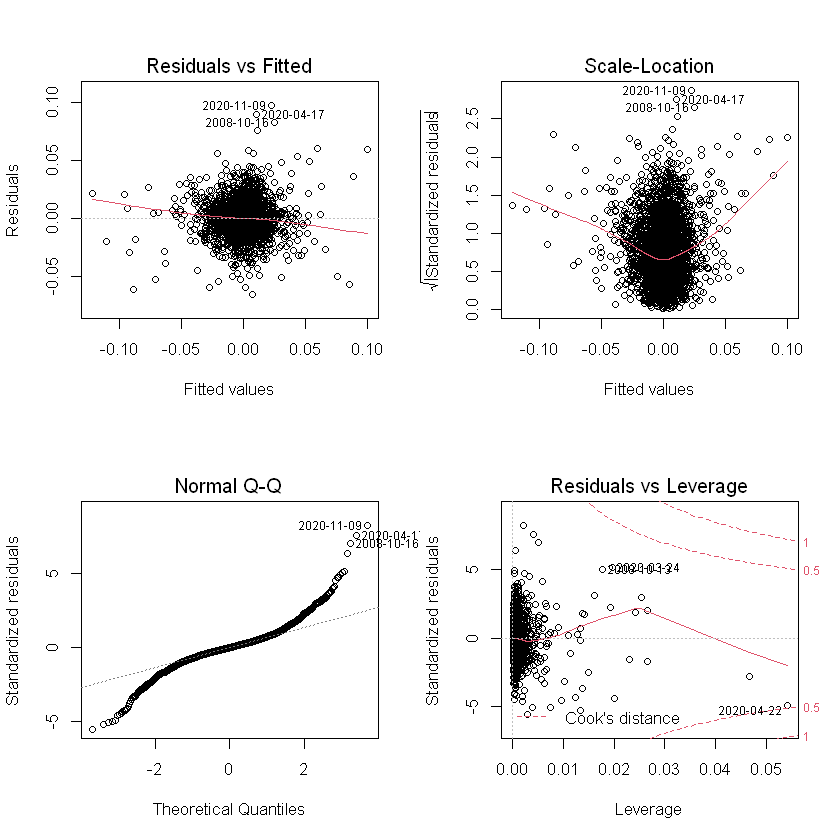

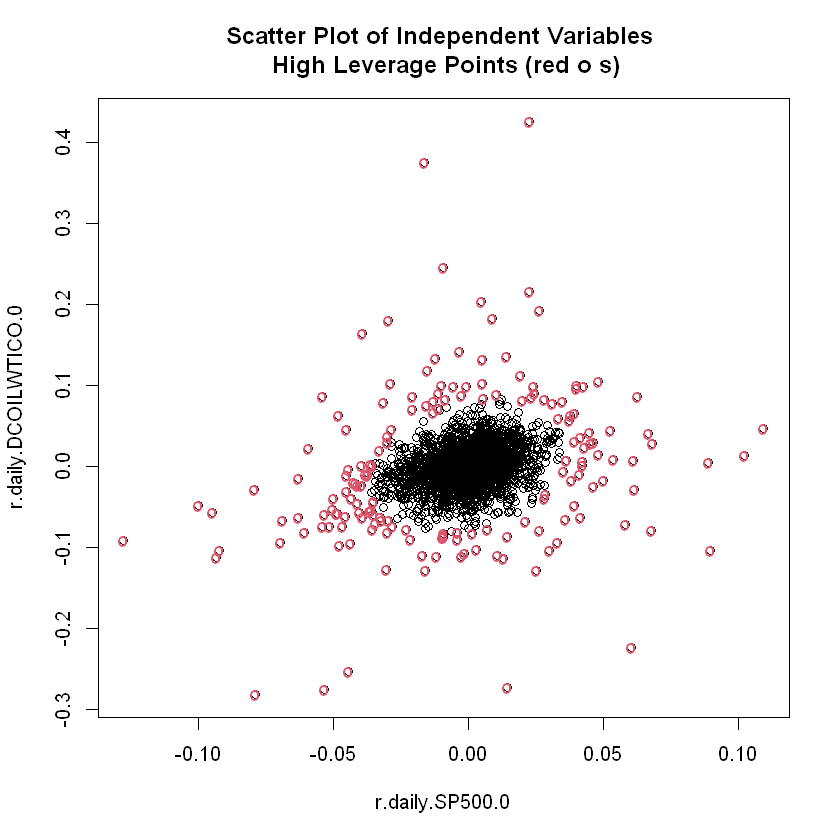

In [10]:

# The linear regression for the simple CAPM:
lmfit0<-lm( r.daily.XOM.0 ~ r.daily.SP500.0 , data=r.daily.data00)
summary.lm(lmfit0)

# The linear regression for the extended CAPM:
lmfit1<-lm( r.daily.XOM.0 ~ r.daily.SP500.0 + r.daily.DCOILWTICO.0, data=r.daily.data00)
summary.lm(lmfit1)

# The R-squared for $XOM$ is lower than for $GE$.  Its relationship to the market index is less strong.

#For the extended model, we use the R function $plot.lm()$ to display regression diagnostic statistics:

layout(matrix(c(1,2,3,4),2,2)) # optional 4 graphs/page 
plot(lmfit1)

#The high-leverage cases in the data are those which have high Mahalanobis distance from the center of the data in terms of the column space of the independent variables (see Regression Analysis Problem Set).

#We display the data in terms of the independent variables and highlight the high-leverage cases.

# Refit the model using argument x=TRUE so that the lm object includes the
# matrix of independent variables
lmfit1<-lm(r.daily.XOM.0 ~ r.daily.SP500.0 + r.daily.DCOILWTICO,
           data=r.daily.data00,
           x=TRUE)
names(lmfit1)
dim(lmfit1$x)
head(lmfit1$x)

#We now  compute the leverage (and other influence measures) with the function $influence.measures()$
#and display the scatter plot of the independent variables, highlighting the high-leverage cases.

lmfit1.inflm<-influence.measures(lmfit1)
index.inf.hat<-which(lmfit1.inflm$is.inf[,"hat"]==TRUE)

par(mfcol=c(1,1))
plot(lmfit1$x[,2], lmfit1$x[,3],xlab="r.daily.SP500.0", ylab="r.daily.DCOILWTICO.0")
title(main="Scatter Plot of Independent Variables \n High Leverage Points (red o s)")

points(lmfit1$x[index.inf.hat,2], lmfit1$x[index.inf.hat,3],
       col=2,
       pch="o")

### Conclusion:

- The beta of XOM with the SP500 is less than 1. This suggest that the asset is less volatile than the overall market
- The regression coefficient for the oil factor ($r.daily.DCOILWTICO$) is statistically significant and positive. This is to be expected since the price of oil is highly correlated with the price of XOM.
- From the above scatter plot, we observe that the highly leveraged points are pretty dispersed from the center. Hence, the OLS model might be overly sensitive to these points, resulting in high variance.